<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

# **CHECKPOINT 3**

</div>

In [156]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [158]:
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = '#FFFFFF'  # bluish dark grey
plt.rcParams['axes.facecolor'] = '#FFFFFF' # bluish dark grey
plt.rcParams['savefig.facecolor'] = '#FFFFFF'  # bluish dark grey

plt.rcParams['legend.borderaxespad'] = 0 # separacion de legend
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['axes.axisbelow'] = True

plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.facecolor'] = '212946' # bluish dark grey

for param in ['axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = 'k'  # very light grey
plt.rcParams['legend.labelcolor'] = 'w' # bluish dark grey

plt.rcParams['text.color']='k'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Regulación de Linea**
</div>

In [161]:
RegulacionDeLinea = pd.read_csv("LTSpice/Regulacion de Linea/Regulacion de Linea.txt", delimiter="\t")
RegulacionDeLinea.head(2)

,vin,V(vo)
0,0.00,-0.00
1,0.10,0.00


In [163]:
RegulacionDeLineaMed = pd.read_csv("Mediciones/Regulacion de Linea/Regulacion de Linea.txt", delimiter="\t")
RegulacionDeLineaMed.head(2)

,vin,V(vo)
0,1.55,0.97
1,2.01,1.39


In [165]:
df_regula = RegulacionDeLineaMed[RegulacionDeLineaMed['vin'] >= 7]

# Buscás el valor de V(vo) más cercano a vin=12 y vin=24
v12 = df_regula.iloc[(df_regula['vin'] - 12).abs().argsort()[:1]]['V(vo)'].values[0]
v24 = df_regula.iloc[(df_regula['vin'] - 24).abs().argsort()[:1]]['V(vo)'].values[0]

# Calculás la regulación de línea como en LTspice
regulacion_linea = (v24 - v12) / 12
print(f"Regulación de línea: {regulacion_linea:.6f} V/V")

Regulación de línea: 0.000833 V/V


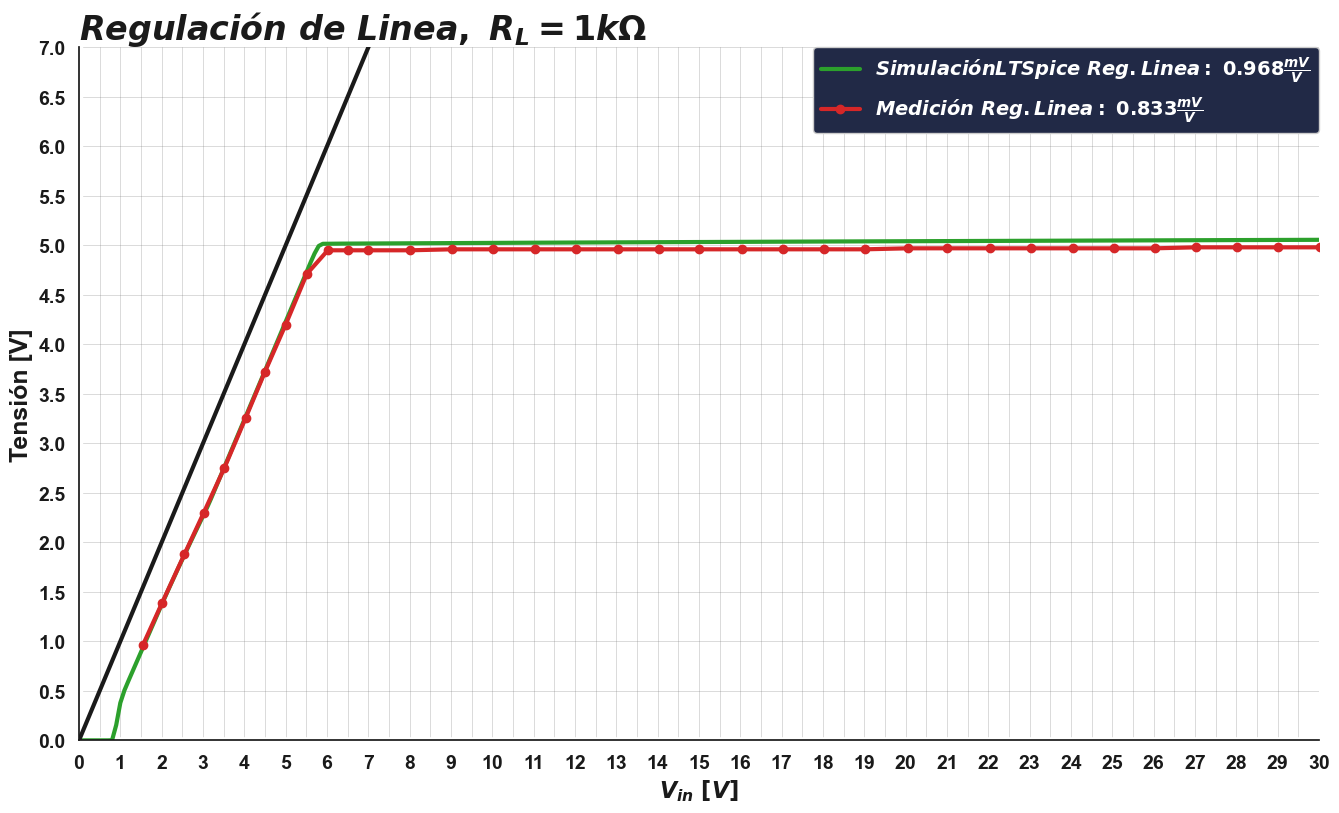

In [167]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax.set_yticks(np.linspace(0, 7, 15), minor=True)
ax.set_xticks(np.linspace(0, 30, 61), minor=True)

ax.set_ylim(0, 7)
ax.set_ylabel("Tensión [V]", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title(f"$Regulación\ de\ Linea,\ R_L=1k\Omega$", fontsize=24, loc="left")  # Título centrado
ax.set_xlabel(r"$V_{in}\ [V]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)


line1, = ax.plot(RegulacionDeLinea["vin"], RegulacionDeLinea["V(vo)"], linestyle='-', linewidth=3, color="tab:green")
line2, = ax.plot(RegulacionDeLineaMed["vin"], RegulacionDeLineaMed["V(vo)"], linestyle='-', marker='o',linewidth=3, color="tab:red")
ax.set_xticks(np.arange(0, 31, 1))
ax.set_yticks(np.arange(0, 7.5, 0.5))

ax.plot(RegulacionDeLinea["vin"], RegulacionDeLinea["vin"], linestyle='-', linewidth=3, color="k")

# Mostrar leyenda
ax.legend([line1,line2], [r"$Simulación LTSpice\ Reg. Linea:\ 0.968\frac{mV}{V}$",r"$Medición\ Reg. Linea:\ 0.833\frac{mV}{V}$"], loc="upper right", fontsize=14)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0, 30)
plt.savefig("CP3_Regulacion_de_Linea.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Regulacion de Carga**
</div>

In [478]:
foldback = pd.read_csv("LTSpice/Regulacion de Carga/Regulacion de Carga.txt", delimiter="\t")
foldback.head(2)

,rl,V(vo),I(Rl)
0,0.00,0.00,0.43
1,0.00,0.00,0.43


In [170]:
foldbackMed = pd.read_csv("Mediciones/Regulacion de Carga/Regulacion de Carga.txt", delimiter="\t")
foldbackMed['I(Rl)']=foldbackMed['V(vo)']/foldbackMed['rl']
foldbackMed.head(2)

,rl,V(vo),I(Rl)
0,"3,278.00",4.98,0.00
1,"2,009.00",4.98,0.00


In [171]:
foldbackMed['rl'] = foldbackMed['rl'].astype(str).str.replace(',', '.').astype(float)

# Filtrar donde V(vo) >= 9
df_carga = foldbackMed[foldbackMed['V(vo)'] >= 4.9]

# Buscar los puntos de corriente mínima y máxima
fila_min_corr = df_carga.loc[df_carga['I(Rl)'].idxmin()]
fila_max_corr = df_carga.loc[df_carga['I(Rl)'].idxmax()]

# Obtener valores
Vo1rc = fila_min_corr['V(vo)']
Vo2rc = fila_max_corr['V(vo)']
Io1rc = fila_min_corr['I(Rl)']
Io2rc = fila_max_corr['I(Rl)']

# Calcular regulación de carga
regulacion_carga = -(Vo2rc - Vo1rc) / (Io2rc - Io1rc)
print(f"Regulación de carga: {regulacion_carga:.6f} V/A")

Regulación de carga: 0.057205 V/A


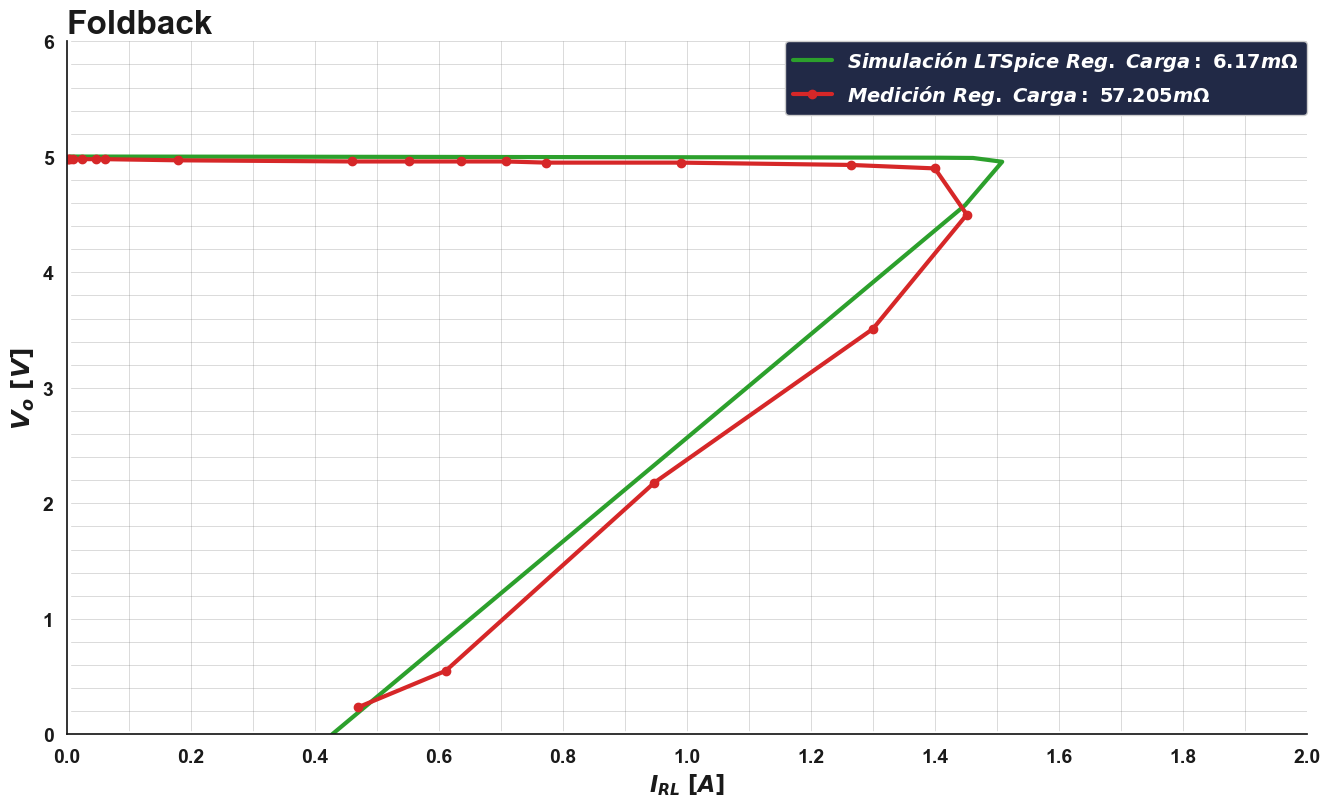

In [177]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax.set_yticks(np.linspace(0, 6, 31), minor=True)
ax.set_xticks(np.linspace(0, 2, 21), minor=True)

ax.set_ylim(0, 6)
ax.set_ylabel(r"$V_o\ [V]$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title("Foldback", fontsize=24, loc="left")  # Título centrado
ax.set_xlabel(r"$I_{RL}\ [A]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.4)
ax.set_xticks(np.arange(0, 2.1, 0.2))

line1, = ax.plot(foldback["I(Rl)"], foldback["V(vo)"], linestyle='-', linewidth=3, color="tab:green")
line2, = ax.plot(foldbackMed["I(Rl)"], foldbackMed["V(vo)"], linestyle='-', linewidth=3,marker='o' ,color="tab:red")

# Mostrar leyenda
ax.legend([line1,line2], [r"$Simulación\ LTSpice\ Reg.\ Carga:\ 6.17m \Omega $",r"$Medición\ Reg.\ Carga:\ 57.205m \Omega $"], loc="upper right", fontsize=14)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0, 2)
plt.savefig("CP3_Foldback.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Regulacion de Carga en funcion de RL**
</div>

In [179]:
regulacionDeCarga = pd.read_csv("LTSpice/Regulacion de Carga/Regulacion de Carga.txt", delimiter="\t")
regulacionDeCarga.head(2)

,rl,V(vo),I(Rl)
0,0.00,0.00,0.43
1,0.00,0.00,0.43


In [180]:
regulacionDeCargaMed = pd.read_csv("Mediciones/Regulacion de Carga/Regulacion de Carga.txt", delimiter="\t")
regulacionDeCargaMed['I(Rl)']=regulacionDeCargaMed['V(vo)']/regulacionDeCargaMed['rl']
regulacionDeCargaMed.head(2)

,rl,V(vo),I(Rl)
0,"3,278.00",4.98,0.00
1,"2,009.00",4.98,0.00


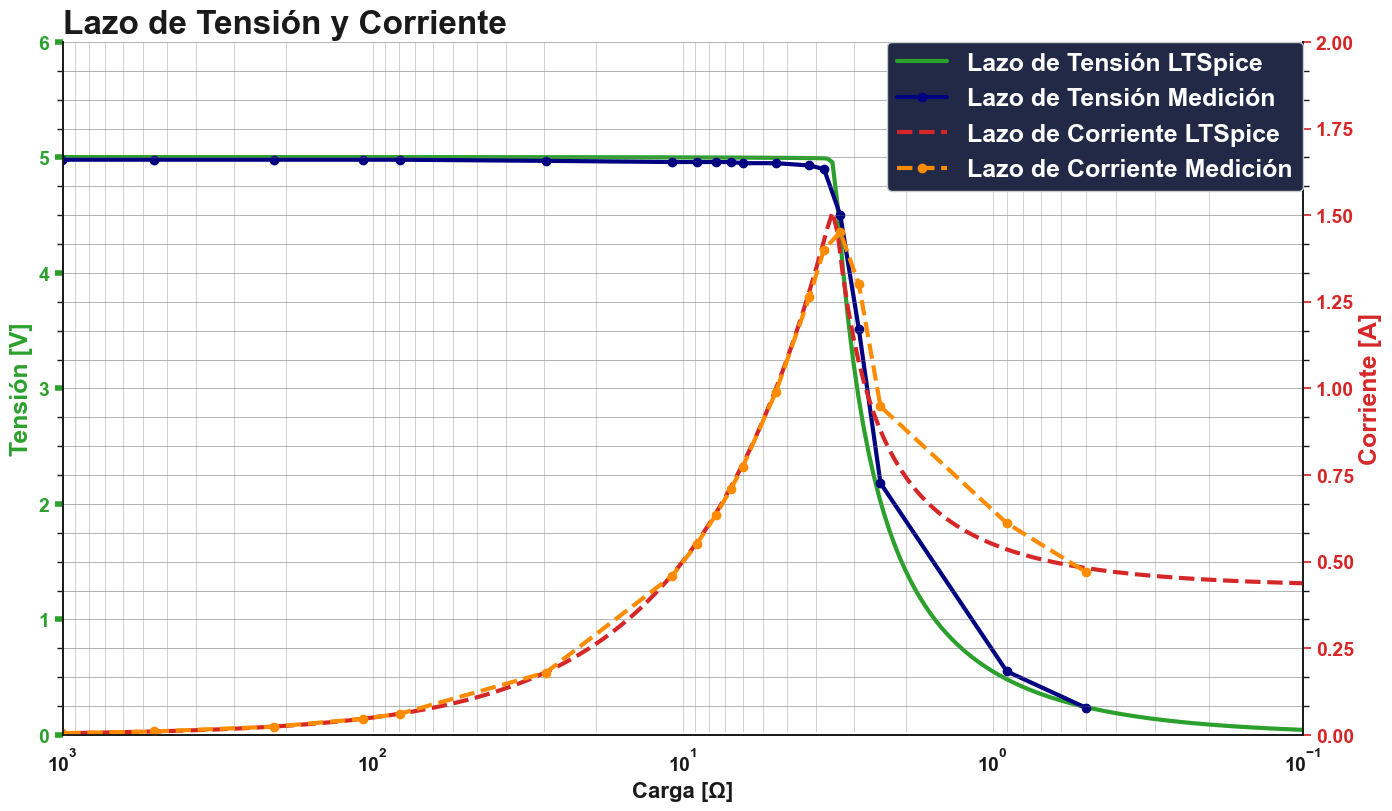

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0, 6, 25), minor=True)
ax1.set_ylim(0, 6)
ax1.set_ylabel("Tensión [V]", fontsize=18, color="tab:green")
ax1.tick_params(axis='y', labelsize=14, colors='tab:green')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')

# Configurar los ticks del eje X
a = np.append(np.linspace(0, 1, 11), np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

# Crear un segundo eje Y para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente [A]", fontsize=18, color='tab:red')  # Etiqueta del eje Y de corriente
ax2.set_ylim(0, np.max(regulacionDeCarga["I(Rl)"]) * 1.1)  # Ajustar la escala de corriente
ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.tick_params(axis='y', labelsize=14, colors='tab:red')

# Configurar título y nombre del eje X
plt.title("Lazo de Tensión y Corriente", fontsize=24, loc="left")  # Título centrado
ax1.set_xlabel("Carga [Ω]", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)

# Graficar voltaje en el primer eje
line1, = ax1.plot(regulacionDeCarga["rl"], regulacionDeCarga["V(vo)"], linestyle='-', linewidth=3, color="tab:green")
line3, = ax1.plot(regulacionDeCargaMed["rl"], regulacionDeCargaMed["V(vo)"], linestyle='-', linewidth=3,marker='o' ,color="navy")



# Graficar corriente en el segundo eje
line2, = ax2.plot(regulacionDeCarga["rl"], regulacionDeCarga["I(Rl)"], linestyle='--', linewidth=3, color="tab:red")
line4, = ax2.plot(regulacionDeCargaMed["rl"], regulacionDeCargaMed["I(Rl)"], linestyle='--', linewidth=3,marker='o' ,color="darkorange")

# Mostrar leyenda
ax2.legend([line1, line3, line2, line4], ["Lazo de Tensión LTSpice",
                                  "Lazo de Tensión Medición",
                                  "Lazo de Corriente LTSpice",
                                  "Lazo de Corriente Medición"], loc="upper right", fontsize=18, framealpha=1)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1000, 1e-1)
plt.savefig("CP3_Lazo_Tension_Corriente.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Respuesta a la Señal Cuadrada**
</div>

**Subcompensado**

In [312]:
PulsoSubCompensado_RL_220 = pd.read_csv("LTSpice/Pulso/Pulso_Sub_Compensado_RL_220.txt", delimiter="\t")
PulsoSubCompensado_RL_220.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.00,-0.02


In [314]:
PulsoSubCompensadoRL220Med = pd.read_csv("Mediciones/Pulso/220/sub compensado/sub compensado.csv", 
                 skiprows=6, header=None, names=["Vo"])

# Parámetros de muestreo
fs = 8_000_000  # 8 MSa/s
dt = 1 / fs     # 125 ns
n = len(df)

# Agregar columna de tiempo correctamente
PulsoSubCompensadoRL220Med["Time"] = np.linspace(0, (n - 1) * dt, n)

# Guardar archivo con tiempo
PulsoSubCompensadoRL220Med.to_csv("archivo_con_tiempo.csv", index=False)

# Mostrar DataFrame
PulsoSubCompensadoRL220Med.head(2)

,Vo,Time
0,0.80,0.00
1,1.20,0.00


In [316]:
PulsoSubCompensadoRL220Med.Vo.mean()

2.76046875

In [318]:
PulsoSubCompensado_RL_1k = pd.read_csv("LTSpice/Pulso/Pulso_Sub_Compensado_RL_1k.txt", delimiter="\t")
PulsoSubCompensado_RL_1k.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.00,-0.02


In [320]:
PulsoSubCompensadoRL1kMed = pd.read_csv("Mediciones/Pulso/1k/sub compensado/sub compensado.csv", 
                 skiprows=6, header=None, names=["Vo"])

# Parámetros de muestreo
fs = 8_000_000  # 8 MSa/s
dt = 1 / fs     # 125 ns
n = len(df)

# Agregar columna de tiempo correctamente
PulsoSubCompensadoRL1kMed["Time"] = np.linspace(0, (n - 1) * dt, n)

# Guardar archivo con tiempo
PulsoSubCompensadoRL1kMed.to_csv("archivo_con_tiempo.csv", index=False)

# Mostrar DataFrame
PulsoSubCompensadoRL1kMed.head(2)

,Vo,Time
0,-0.40,0.00
1,0.40,0.00


In [322]:
PulsoSubCompensadoRL1kMed.Vo.mean()

2.8122437500000004

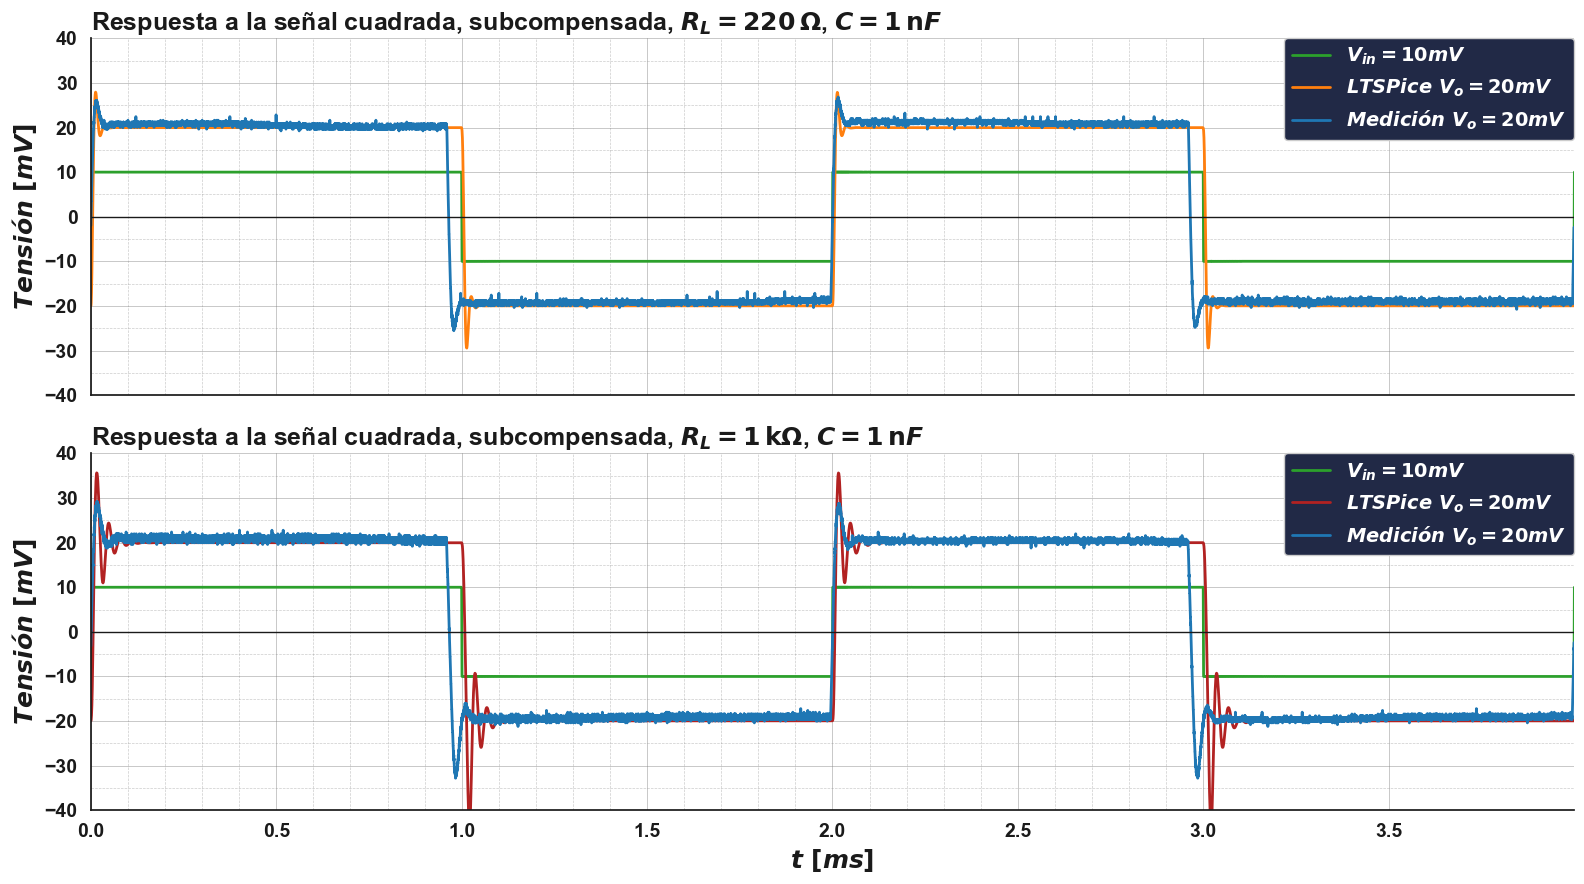

In [346]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=[16, 9], sharex=True)

# Definir colores
color_vin = "tab:green"
color_vo_220 = "tab:orange"
color_vo_1k = "firebrick"
color_medicion_220 = "tab:blue"  # Nuevo color para medición RL=220Ω
color_medicion_1k = "tab:blue"  # Nuevo color para medición RL=1kΩ

# Datos de tiempo
time_ms = PulsoSubCompensado_RL_220["Time"] * 1000

# Primer subplot: Vin y Vo para RL=220Ω
axs[0].plot(time_ms, PulsoSubCompensado_RL_220["Vin"]*1000, linestyle='-', linewidth=2, color=color_vin, label=r"$V_{in}=10mV$")
axs[0].plot(PulsoSubCompensado_RL_220["Time"]*1000, PulsoSubCompensado_RL_220["Vo"]*1000, linestyle='-', linewidth=2, color=color_vo_220, label=r"$LTSPice\ V_{o}=20mV$")
axs[0].plot(PulsoSubCompensadoRL220Med["Time"]*1000, PulsoSubCompensadoRL220Med["Vo"]-2.76046875, linestyle='-', linewidth=2, color=color_medicion_220, label=r"$Medición\ V_{o}=20mV$")
axs[0].axhline(0, linestyle='-', linewidth=1, color='k')
axs[0].set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
axs[0].legend(loc="upper right", fontsize=14)
axs[0].set_title(r"Respuesta a la señal cuadrada, subcompensada, $R_L = 220\,\Omega$, $C = 1\,\text{n}F$", loc="left", fontsize=18)

# Segundo subplot: Vin y Vo para RL=1kΩ
axs[1].plot(PulsoSubCompensado_RL_1k["Time"]*1000, PulsoSubCompensado_RL_1k["Vin"]*1000, linestyle='-', linewidth=2, color=color_vin, label=r"$V_{in}=10mV$")
axs[1].plot(PulsoSubCompensado_RL_1k["Time"]*1000, PulsoSubCompensado_RL_1k["Vo"]*1000, linestyle='-', linewidth=2, color=color_vo_1k, label=r"$LTSPice\ V_{o}=20mV$")
axs[1].plot(PulsoSubCompensadoRL1kMed["Time"]*1000, PulsoSubCompensadoRL1kMed["Vo"]-2.8122437500000004, linestyle='-', linewidth=2, color=color_medicion_1k, label=r"$Medición\ V_{o}=20mV$")

axs[1].axhline(0, linestyle='-', linewidth=1, color='k')
axs[1].set_xlabel(r"$t\ [ms]$", fontsize=18)
axs[1].set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
axs[1].legend(loc="upper right", fontsize=14)
axs[1].set_title(r"Respuesta a la señal cuadrada, subcompensada, $R_L = 1\,\text{k}\Omega$, $C = 1\,\text{n}F$", loc="left", fontsize=18)

# Ajustes comunes a ambos
for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_position(("outward", 0))
    ax.spines["bottom"].set_position(("outward", 0))
    ax.tick_params(axis='both', width=2, labelsize=14)
    ax.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
    ax.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
    ax.set_xlim(0, 4)
    ax.set_ylim(-40, 40)
    ax.set_xticks(np.arange(0, 4, 0.5))
    ax.set_yticks(np.arange(-40, 50, 10))
    ax.set_xticks(np.linspace(0, 3, 31), minor=True)
    ax.set_yticks(np.linspace(-40, 40, 17), minor=True)

# Guardar figura
plt.tight_layout()
plt.savefig("CP3_Pulso_Sub_Compensado_220y1k.png", bbox_inches="tight")
plt.show()

**Compensado**

In [328]:
PulsoCompensado_RL_220 = pd.read_csv("LTSpice/Pulso/Pulso_Compensado_RL_220.txt", delimiter="\t")
PulsoCompensado_RL_220.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.01,-0.02


In [330]:
PulsoCompensadoRL220Med = pd.read_csv("Mediciones/Pulso/220/compensado/compensado.csv", 
                 skiprows=6, header=None, names=["Vo"])

# Parámetros de muestreo
fs = 8_000_000  # 8 MSa/s
dt = 1 / fs     # 125 ns
n = len(df)

# Agregar columna de tiempo correctamente
PulsoCompensadoRL220Med["Time"] = np.linspace(0, (n - 1) * dt, n)

# Guardar archivo con tiempo
PulsoCompensadoRL220Med.to_csv("archivo_con_tiempo.csv", index=False)

# Mostrar DataFrame
PulsoCompensadoRL220Med.head(2)

,Vo,Time
0,0.00,0.00
1,0.00,0.00


In [332]:
PulsoCompensado_RL_1k = pd.read_csv("LTSpice/Pulso/Pulso_Compensado_RL_1k.txt", delimiter="\t")
PulsoCompensado_RL_1k.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.01,-0.02


In [334]:
PulsoCompensadoRL1kMed = pd.read_csv("Mediciones/Pulso/1k/compensado/compensado.csv", 
                 skiprows=6, header=None, names=["Vo"])

# Parámetros de muestreo
fs = 8_000_000  # 8 MSa/s
dt = 1 / fs     # 125 ns
n = len(df)

# Agregar columna de tiempo correctamente
PulsoCompensadoRL1kMed["Time"] = np.linspace(0, (n - 1) * dt, n)

# Guardar archivo con tiempo
PulsoCompensadoRL1kMed.to_csv("archivo_con_tiempo.csv", index=False)

# Mostrar DataFrame
PulsoCompensadoRL1kMed.head(2)

,Vo,Time
0,0.00,0.00
1,0.80,0.00


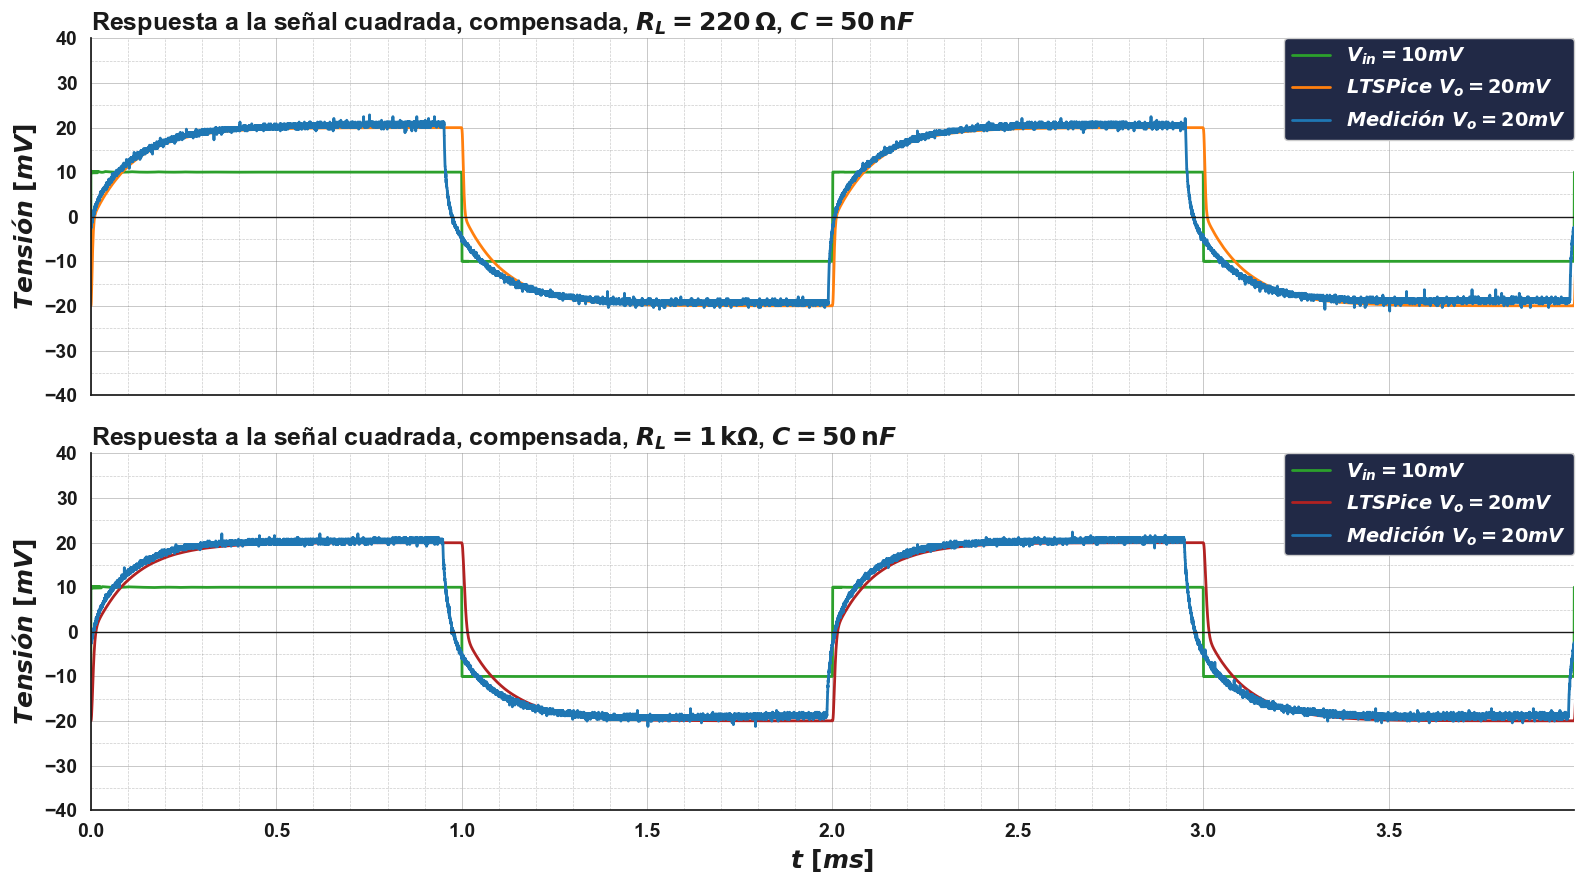

In [367]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=[16, 9], sharex=True)

# Definir colores
color_vin = "tab:green"
color_vo_220 = "tab:orange"
color_vo_1k = "firebrick"
color_medicion_220 = "tab:blue"  # Nuevo color para medición RL=220Ω
color_medicion_1k = "tab:blue"  # Nuevo color para medición RL=1kΩ

# Datos de tiempo
time_ms = PulsoCompensado_RL_220["Time"] * 1000

# Primer subplot: Vin y Vo para RL=220Ω
axs[0].plot(time_ms, PulsoCompensado_RL_220["Vin"]*1000, linestyle='-', linewidth=2, color=color_vin, label=r"$V_{in}=10mV$")
axs[0].plot(PulsoCompensado_RL_220["Time"]*1000, PulsoCompensado_RL_220["Vo"]*1000, linestyle='-', linewidth=2, color=color_vo_220, label=r"$LTSPice\ V_{o}=20mV$")
axs[0].plot(PulsoCompensadoRL220Med["Time"]*1000, PulsoCompensadoRL220Med["Vo"]-2.76046875, linestyle='-', linewidth=2, color=color_medicion_220, label=r"$Medición\ V_{o}=20mV$")
axs[0].axhline(0, linestyle='-', linewidth=1, color='k')
axs[0].set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
axs[0].legend(loc="upper right", fontsize=14)
axs[0].set_title(r"Respuesta a la señal cuadrada, compensada, $R_L = 220\,\Omega$, $C = 50\,\text{n}F$", loc="left", fontsize=18)

# Segundo subplot: Vin y Vo para RL=1kΩ
axs[1].plot(PulsoCompensado_RL_1k["Time"]*1000, PulsoCompensado_RL_1k["Vin"]*1000, linestyle='-', linewidth=2, color=color_vin, label=r"$V_{in}=10mV$")
axs[1].plot(PulsoCompensado_RL_1k["Time"]*1000, PulsoCompensado_RL_1k["Vo"]*1000, linestyle='-', linewidth=2, color=color_vo_1k, label=r"$LTSPice\ V_{o}=20mV$")
axs[1].plot(PulsoCompensadoRL1kMed["Time"]*1000, PulsoCompensadoRL1kMed["Vo"]-2.8122437500000004, linestyle='-', linewidth=2, color=color_medicion_1k, label=r"$Medición\ V_{o}=20mV$")

axs[1].axhline(0, linestyle='-', linewidth=1, color='k')
axs[1].set_xlabel(r"$t\ [ms]$", fontsize=18)
axs[1].set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
axs[1].legend(loc="upper right", fontsize=14)
axs[1].set_title(r"Respuesta a la señal cuadrada, compensada, $R_L = 1\,\text{k}\Omega$, $C = 50\,\text{n}F$", loc="left", fontsize=18)

# Ajustes comunes a ambos
for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_position(("outward", 0))
    ax.spines["bottom"].set_position(("outward", 0))
    ax.tick_params(axis='both', width=2, labelsize=14)
    ax.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
    ax.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
    ax.set_xlim(0, 4)
    ax.set_ylim(-40, 40)
    ax.set_xticks(np.arange(0, 4, 0.5))
    ax.set_yticks(np.arange(-40, 50, 10))
    ax.set_xticks(np.linspace(0, 3, 31), minor=True)
    ax.set_yticks(np.linspace(-40, 40, 17), minor=True)

# Guardar figura
plt.tight_layout()
plt.savefig("CP3_Pulso_Compensado_220y1k.png", bbox_inches="tight")
plt.show()

**Sobrecompensado**

In [351]:
PulsoSobreCompensado_RL_220 = pd.read_csv("LTSpice/Pulso/Pulso_Sobre_Compensado_RL_220.txt", delimiter="\t")
PulsoSobreCompensado_RL_220.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.01,-0.02


In [353]:
PulsoSobreCompensadoRL220Med = pd.read_csv("Mediciones/Pulso/220/sobre compensado/sobre compensado.csv", 
                 skiprows=6, header=None, names=["Vo"])

# Parámetros de muestreo
fs = 8_000_000  # 8 MSa/s
dt = 1 / fs     # 125 ns
n = len(df)

# Agregar columna de tiempo correctamente
PulsoSobreCompensadoRL220Med["Time"] = np.linspace(0, (n - 1) * dt, n)

# Guardar archivo con tiempo
PulsoSobreCompensadoRL220Med.to_csv("archivo_con_tiempo.csv", index=False)

# Mostrar DataFrame
PulsoSobreCompensadoRL220Med.head(2)

,Vo,Time
0,0.00,0.00
1,0.80,0.00


In [357]:
PulsoSobreCompensado_RL_1k = pd.read_csv("LTSpice/Pulso/Pulso_Sobre_Compensado_RL_1k.txt", delimiter="\t")
PulsoSobreCompensado_RL_1k.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.01,-0.02


In [359]:
PulsoSobreCompensadoRL1kMed = pd.read_csv("Mediciones/Pulso/1k/sobre compensado/sobre compensado.csv", 
                 skiprows=6, header=None, names=["Vo"])

# Parámetros de muestreo
fs = 8_000_000  # 8 MSa/s
dt = 1 / fs     # 125 ns
n = len(df)

# Agregar columna de tiempo correctamente
PulsoSobreCompensadoRL1kMed["Time"] = np.linspace(0, (n - 1) * dt, n)

# Guardar archivo con tiempo
PulsoSobreCompensadoRL1kMed.to_csv("archivo_con_tiempo.csv", index=False)

# Mostrar DataFrame
PulsoSobreCompensadoRL1kMed.head(2)

,Vo,Time
0,0.00,0.00
1,0.40,0.00


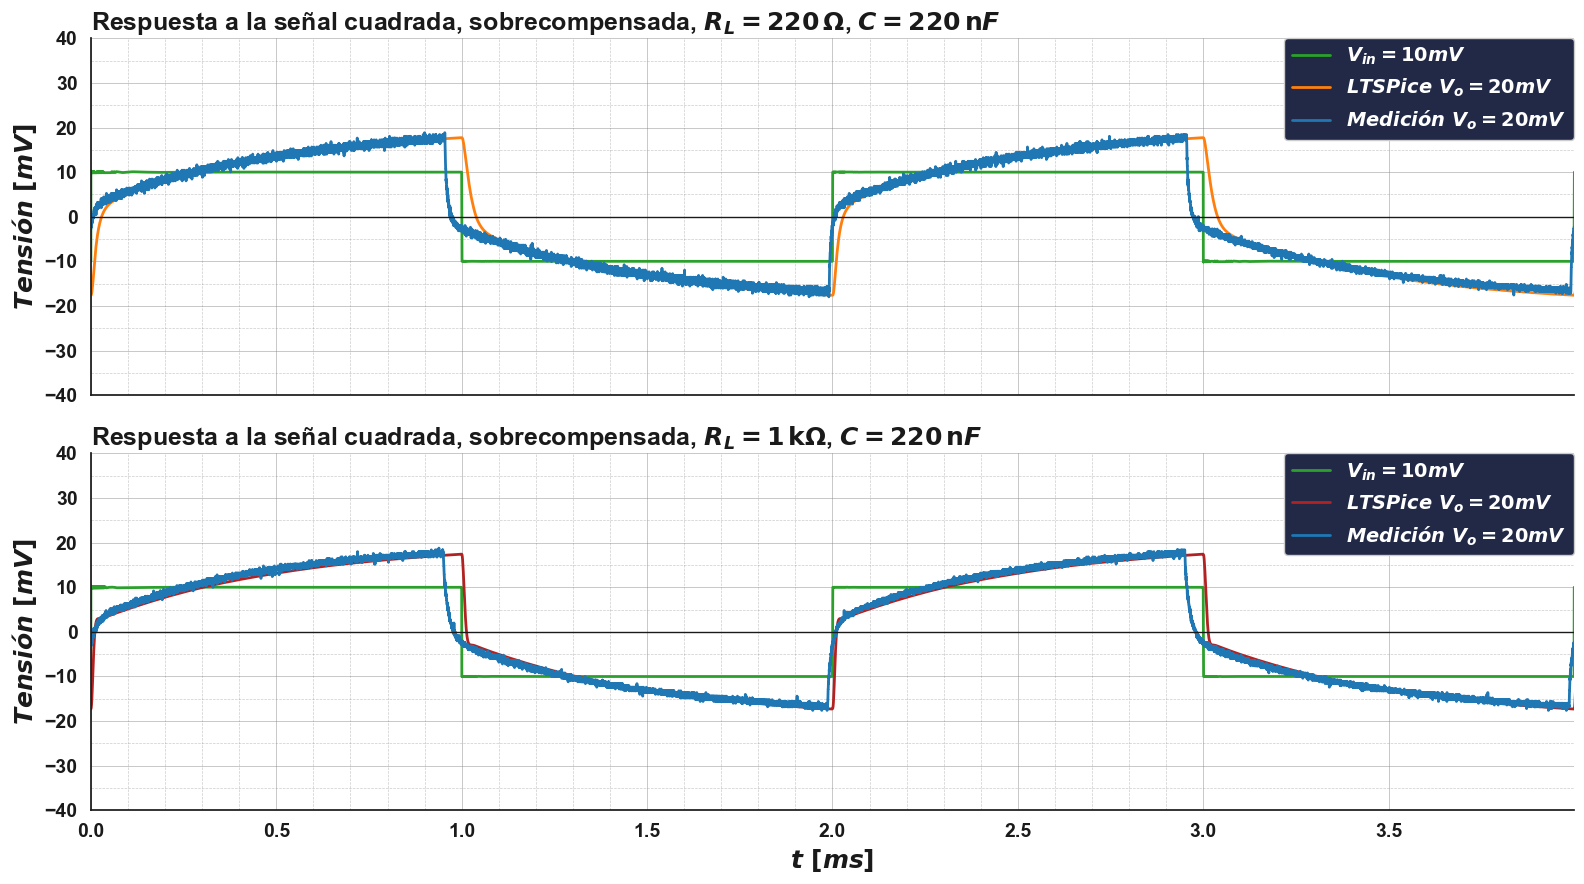

In [365]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=[16, 9], sharex=True)

# Definir colores
color_vin = "tab:green"
color_vo_220 = "tab:orange"
color_vo_1k = "firebrick"
color_medicion_220 = "tab:blue"  # Nuevo color para medición RL=220Ω
color_medicion_1k = "tab:blue"  # Nuevo color para medición RL=1kΩ

# Datos de tiempo
time_ms = PulsoSobreCompensado_RL_220["Time"] * 1000

# Primer subplot: Vin y Vo para RL=220Ω
axs[0].plot(time_ms, PulsoSobreCompensado_RL_220["Vin"]*1000, linestyle='-', linewidth=2, color=color_vin, label=r"$V_{in}=10mV$")
axs[0].plot(PulsoSobreCompensado_RL_220["Time"]*1000, PulsoSobreCompensado_RL_220["Vo"]*1000, linestyle='-', linewidth=2, color=color_vo_220, label=r"$LTSPice\ V_{o}=20mV$")
axs[0].plot(PulsoSobreCompensadoRL220Med["Time"]*1000, PulsoSobreCompensadoRL220Med["Vo"]-2.76046875, linestyle='-', linewidth=2, color=color_medicion_220, label=r"$Medición\ V_{o}=20mV$")
axs[0].axhline(0, linestyle='-', linewidth=1, color='k')
axs[0].set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
axs[0].legend(loc="upper right", fontsize=14)
axs[0].set_title(r"Respuesta a la señal cuadrada, sobrecompensada, $R_L = 220\,\Omega$, $C = 220\,\text{n}F$", loc="left", fontsize=18)

# Segundo subplot: Vin y Vo para RL=1kΩ
axs[1].plot(PulsoSobreCompensado_RL_1k["Time"]*1000, PulsoSobreCompensado_RL_1k["Vin"]*1000, linestyle='-', linewidth=2, color=color_vin, label=r"$V_{in}=10mV$")
axs[1].plot(PulsoSobreCompensado_RL_1k["Time"]*1000, PulsoSobreCompensado_RL_1k["Vo"]*1000, linestyle='-', linewidth=2, color=color_vo_1k, label=r"$LTSPice\ V_{o}=20mV$")
axs[1].plot(PulsoSobreCompensadoRL1kMed["Time"]*1000, PulsoSobreCompensadoRL1kMed["Vo"]-2.8122437500000004, linestyle='-', linewidth=2, color=color_medicion_1k, label=r"$Medición\ V_{o}=20mV$")

axs[1].axhline(0, linestyle='-', linewidth=1, color='k')
axs[1].set_xlabel(r"$t\ [ms]$", fontsize=18)
axs[1].set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
axs[1].legend(loc="upper right", fontsize=14)
axs[1].set_title(r"Respuesta a la señal cuadrada, sobrecompensada, $R_L = 1\,\text{k}\Omega$, $C = 220\,\text{n}F$", loc="left", fontsize=18)

# Ajustes comunes a ambos
for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_position(("outward", 0))
    ax.spines["bottom"].set_position(("outward", 0))
    ax.tick_params(axis='both', width=2, labelsize=14)
    ax.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
    ax.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
    ax.set_xlim(0, 4)
    ax.set_ylim(-40, 40)
    ax.set_xticks(np.arange(0, 4, 0.5))
    ax.set_yticks(np.arange(-40, 50, 10))
    ax.set_xticks(np.linspace(0, 3, 31), minor=True)
    ax.set_yticks(np.linspace(-40, 40, 17), minor=True)

# Guardar figura
plt.tight_layout()
plt.savefig("CP3_Pulso_Sobre_Compensado_220y1k.png", bbox_inches="tight")
plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Rendimiento**
</div>

In [377]:
rendimiento220 = pd.read_csv("LTSpice/Rendimiento/Rendimiento220.txt", delimiter="\t")
rendimiento220.head(2)

,vin,Rendimiento
0,1.00,26.82
1,1.00,26.96


In [414]:
rendimiento220Med = pd.read_csv("Mediciones/Rendimiento/Rendimiento220.txt", delimiter="\t")
rendimiento220Med['Rendimiento']=100*(rendimiento220Med.Vo*rendimiento220Med.Vo/rendimiento220Med.Rl)/(rendimiento220Med.Vin*rendimiento220Med.Iin)
rendimiento220Med.head(2)

,Vin,Iin,Vo,Rl,Rendimiento
0,1.09,0.00,0.44,218.80,36.00
1,1.98,0.01,1.32,218.80,51.81


In [468]:
rendimiento1k = pd.read_csv("LTSpice/Rendimiento/Rendimiento1k.txt", delimiter="\t")
rendimiento1k.head(2)

,Vin,Rendimiento
0,1.00,21.61
1,1.00,21.70


In [470]:
rendimiento1kMed = pd.read_csv("Mediciones/Rendimiento/Rendimiento1k.txt", delimiter="\t")
rendimiento1kMed['Rendimiento']=100*1000*(rendimiento1kMed.Vo*rendimiento1kMed.Vo/rendimiento1kMed.Rl)/(rendimiento1kMed.Vin*rendimiento1kMed.Iin)
rendimiento1kMed.head(2)

,Vin,Iin,Vo,Rl,Rendimiento
0,1.00,0.60,0.41,995,28.29
1,2.01,3.10,1.39,995,31.21


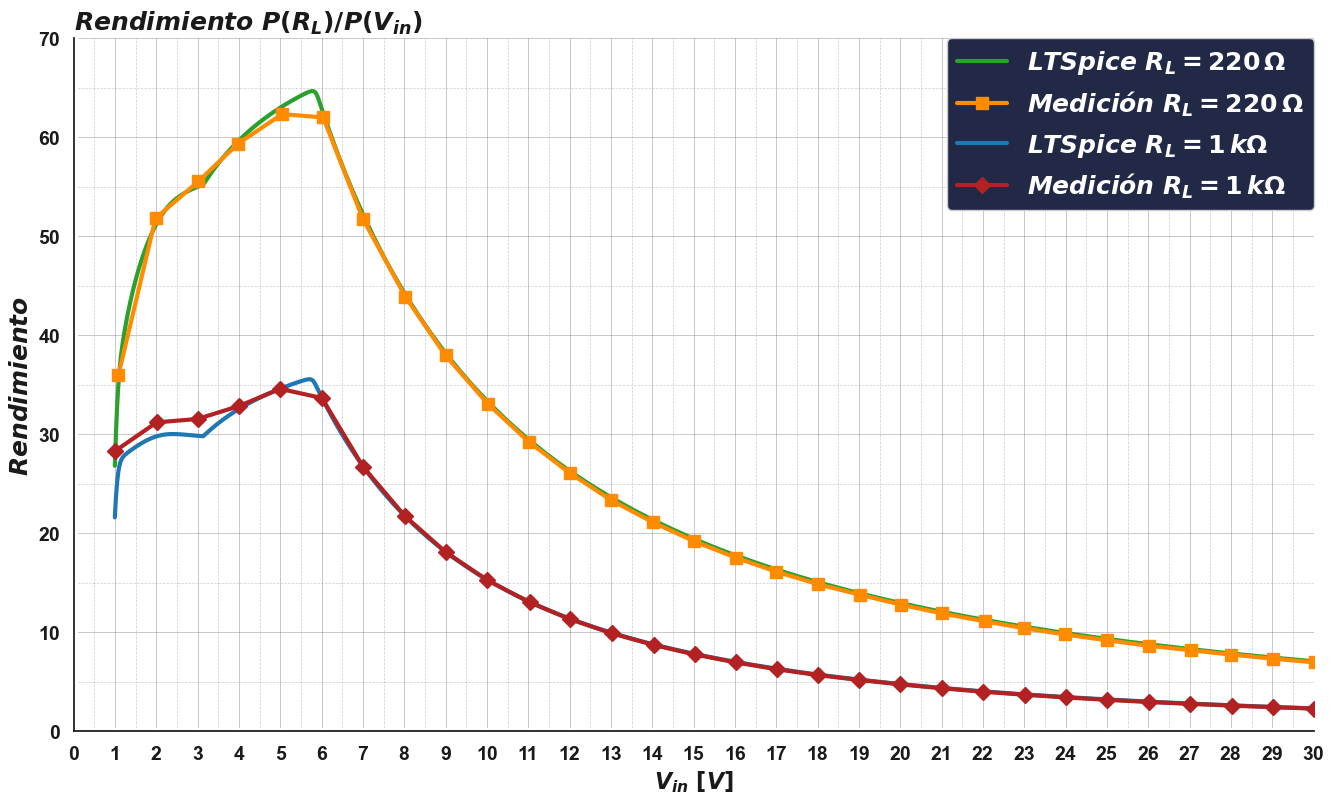

In [476]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks
ax.tick_params(axis='both', width=4, labelsize=30)
ax.set_xticks(np.linspace(0, 30, 61), minor=True)
ax.set_yticks(np.linspace(0, 70, 15), minor=True)
ax.set_ylim(-50e-3, 50e-3)
ax.set_ylabel(r"$Rendimiento$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

# Líneas de referencia
ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')

# Título y eje X
plt.title(r"$Rendimiento\ $"  r"$P(R_L)/P(V_{in})$", fontsize=18, loc="left")
ax.set_xlabel(r"$V_{in}\ [V]$", fontsize=16)

# Grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)

# Colores contrastantes
color_220_sim = "tab:green"
color_220_med = "darkorange"
color_1k_sim = "tab:blue"
color_1k_med = "firebrick"

# Curvas
line1, = ax.plot(rendimiento220["vin"], rendimiento220["Rendimiento"], linestyle='-', linewidth=3, color=color_220_sim)
line2, = ax.plot(rendimiento220Med["Vin"], rendimiento220Med["Rendimiento"], linestyle='-', linewidth=3, marker='s', markersize=8, color=color_220_med)
line3, = ax.plot(rendimiento1k["Vin"], rendimiento1k["Rendimiento"], linestyle='-', linewidth=3, color=color_1k_sim)
line4, = ax.plot(rendimiento1kMed["Vin"], rendimiento1kMed["Rendimiento"], linestyle='-', linewidth=3, marker='D', markersize=8, color=color_1k_med)

# Líneas guía
ax.axhline(0, linestyle='-', linewidth=1, c='k')
ax.set_xticks(np.arange(0, 31, 1))
plt.xlim(0, 30)
plt.ylim(0, 70)

# Leyenda
ax.legend([line1, line2, line3, line4],
          [r"$LTSpice\ R_L = 220\,\Omega$", 
           r"$Medición\ R_L = 220\,\Omega$", 
           r"$LTSpice\ R_L = 1\,k\Omega$", 
           r"$Medición\ R_L = 1\,k\Omega$"],
          loc="upper right", fontsize=18)

plt.savefig("CP3_Rendimiento.png", bbox_inches="tight")
plt.show()



<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Potencia Disipada por el Transistor de Paso**
</div>

In [481]:
PotenciaTIP42C = pd.read_csv("LTSpice/Potencia Disipada/Potencia Disipada Transistor de Paso.txt", delimiter="\t")
PotenciaTIP42C.head(2)

,RL,TIP42C
0,0.00,3.66
1,0.00,3.66


In [505]:
PotenciaTIP42CMed = pd.read_csv("Mediciones/Regulacion de Carga/Regulacion de Carga.txt", delimiter="\t")
PotenciaTIP42CMed['Irl']=PotenciaTIP42CMed['V(vo)']/PotenciaTIP42CMed['rl']
PotenciaTIP42CMed['VTIP']=9.5-PotenciaTIP42CMed['V(vo)']
PotenciaTIP42CMed['Pot']=PotenciaTIP42CMed['VTIP']*PotenciaTIP42CMed['Irl']
PotenciaTIP42CMed.head(2)

,rl,V(vo),Irl,VTIP,Pot
0,"3,278.00",4.98,0.00,4.52,0.01
1,"2,009.00",4.98,0.00,4.52,0.01


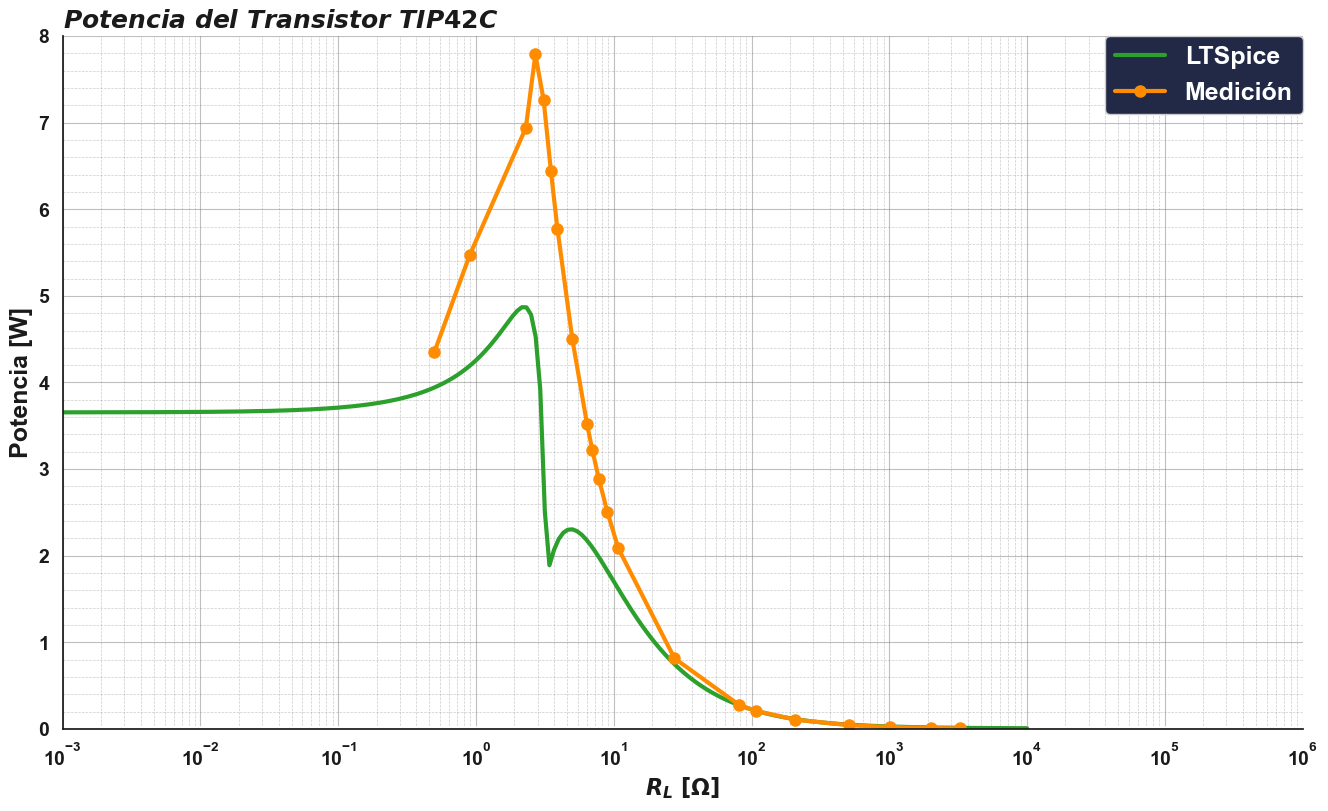

In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))
ax1.set_xlabel(r"$R_L\ [\Omega]$", fontsize=16)  # Nombre del eje X

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0,8, 41), minor=True)
ax1.set_ylabel("Potencia [W]", fontsize=18, color="k")
ax1.tick_params(axis='y', labelsize=14, colors='k')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')
plt.title(r"$Potencia\ del\ Transistor\ TIP42C$", fontsize=18, loc="left")  # Título centrado

# Configurar los ticks del eje X
a = np.append(np.linspace(0.001, 0.01, 11), np.linspace(0.01, 0.1, 11))
a = np.append(a, np.linspace(0.1, 1, 11))
a = np.append(a, np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
line1, = ax1.plot(PotenciaTIP42C["RL"], PotenciaTIP42C["TIP42C"],
                  linestyle='-', linewidth=3, color="tab:green")
line2, = ax1.plot(PotenciaTIP42CMed["rl"], PotenciaTIP42CMed["Pot"],
                  linestyle='-', linewidth=3, marker='o', markersize=8, color="darkorange")

plt.grid(which="major", color="grey", linestyle="-", linewidth=0.8, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)

# Mostrar leyenda
ax1.legend([line1,line2], ["LTSpice","Medición"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1e-3,1e6)
ax1.set_ylim(0, 8)

plt.savefig("CP3_Potencia_TIP42C.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Tiempo de StartUp Sub Compensado**
    
</div>

In [167]:
tStartUpSub = pd.read_csv("LTSpice/tStartUp/tStartUpSubcompensado.txt", delimiter="\t")
tStartUpSub['time'] = tStartUpSub['time']- 1/1000 
tStartUpSub.head(2)

,time,V(vo),V(vregp),I(Rl)
0,-0.00,0.00,0.00,0.00
1,0.00,-0.00,0.00,-0.00


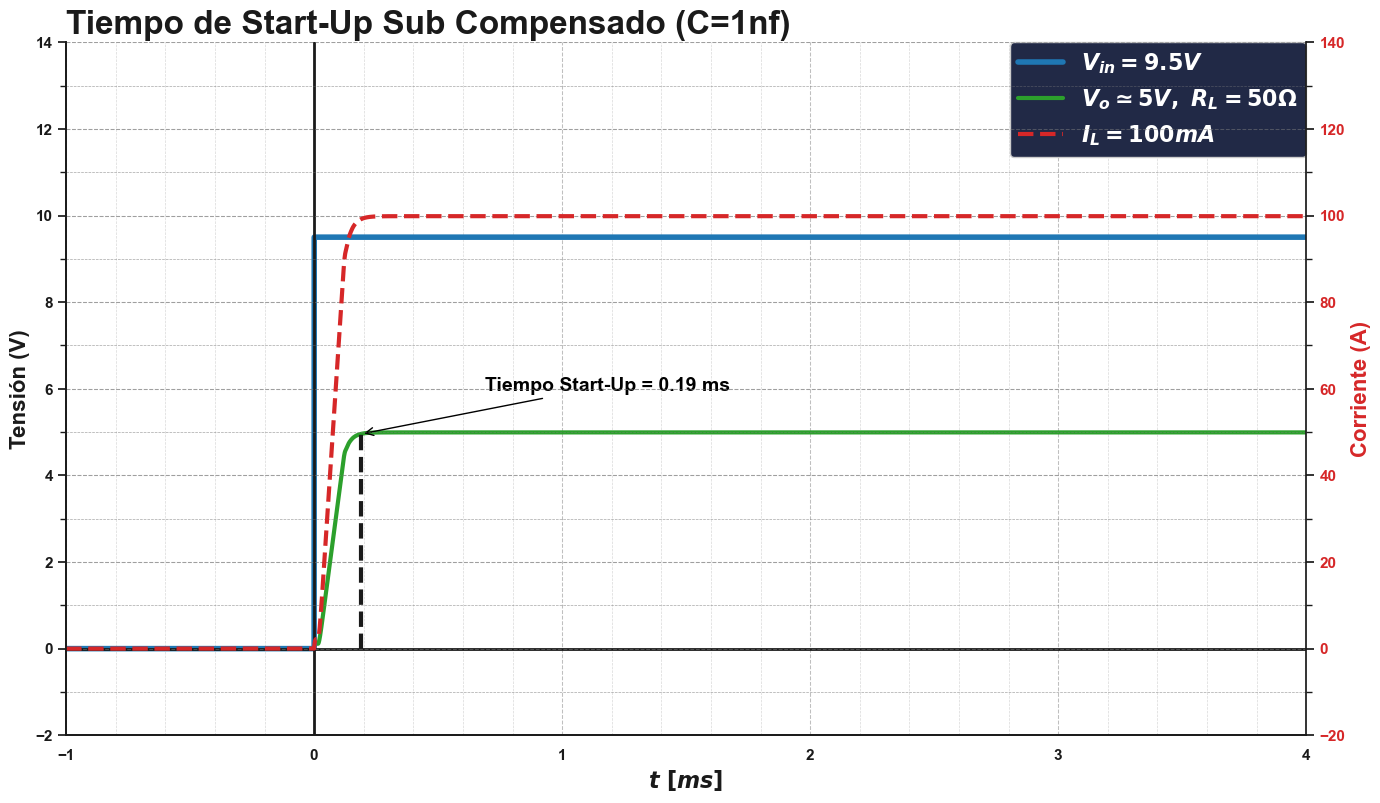

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Crear la figura
plt.figure(figsize=(16, 9))
ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

ax1.set_yticks(np.linspace(-2,14, 17), minor=True)

# Etiquetas de ejes
ax1.set_xlabel("$t\ [ms]$", fontsize=16)
ax1.set_ylabel("Tensión (V)", fontsize=16, color="k")

# Graficar tensión
line1, = ax1.plot(tStartUpSub["time"]*1000, tStartUpSub["V(vo)"], linewidth=3, color="tab:green")
line2, = ax1.plot(tStartUpSub["time"]*1000, tStartUpSub["V(vregp)"], linewidth=4, color="tab:blue")

valor_final = tStartUpSub["V(vo)"].iloc[-1]
valor_99_3 = 0.993 * valor_final
instante_99_3 = tStartUpSub[tStartUpSub["V(vo)"] >= valor_99_3]["time"].iloc[0]

# Añadir anotación
ax1.vlines(x=instante_99_3*1000, ymin=0, ymax=valor_99_3, color='k', linewidth=3, linestyles='--')
ax1.annotate(
    r"Tiempo Start-Up = {:.2f} ms".format(instante_99_3*1000 ),
    xy=(instante_99_3 * 1000, valor_99_3),
    xytext=(instante_99_3 * 1000 + 0.5, valor_99_3 + 1),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=14,
    color="black"
)

ax1.tick_params(axis="y", labelcolor="k")
ax1.set_ylim(-2, 14)
ax1.axhline(0, linestyle='-', linewidth=2, c='k')
ax1.axvline(0, linestyle='-', linewidth=2, c='k')

ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.2))  # o el paso que prefieras

# Asegurarte de que la grilla se aplique también a X menor
ax1.grid(which="major", axis="both", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
ax1.grid(which="minor", axis="both", color="grey", linestyle="--", linewidth=0.5, alpha=0.3)

# Crear un segundo eje para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente (A)", fontsize=16, color="tab:red")
line3, = ax2.plot(tStartUpSub["time"]*1000, tStartUpSub["I(Rl)"]*1000, linewidth=3, color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_yticks(np.linspace(-20,140, 17), minor=True)
ax2.set_ylim(-20, 140)

# Título y grillas
plt.title("Tiempo de Start-Up Sub Compensado (C=1nf)", fontsize=24, loc="left")
plt.grid(which="major", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.set_xlim(-1, 4)

# Combinar leyendas
ax1.legend([line2, line1,  line3], [r"$V_{in}=9.5V$", r"$V_{o}\simeq5V,\ R_L=50\Omega$",r"$I_{L}=100mA$"], loc="upper right", fontsize=16,framealpha=1)

# Guardar con bordes ajustados
plt.savefig("CP2_tStartUpSub.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Tiempo de StartUp Compensado**
    
</div>

In [175]:
tStartUp = pd.read_csv("LTSpice/tStartUp/tStartUpcompensado.txt", delimiter="\t")
tStartUp['time'] = tStartUp['time'] - 1/1000
tStartUp.head(2)

,time,V(vo),V(vregp),I(Rl)
0,-0.00,0.00,0.00,0.00
1,0.00,-0.00,0.00,-0.00


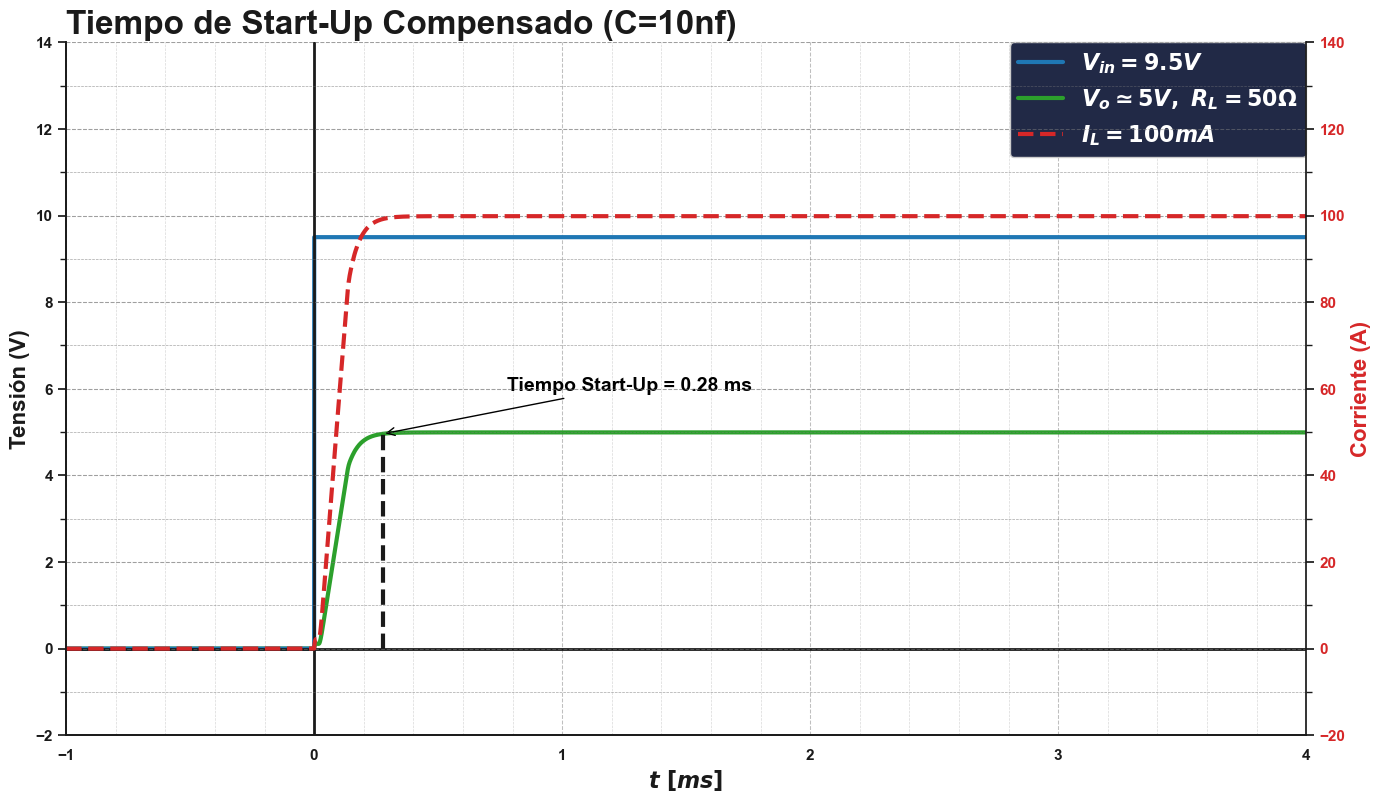

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Crear la figura
plt.figure(figsize=(16, 9))
ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

ax1.set_yticks(np.linspace(-2,14, 17), minor=True)

# Etiquetas de ejes
ax1.set_xlabel("$t\ [ms]$", fontsize=16)
ax1.set_ylabel("Tensión (V)", fontsize=16, color="k")

# Graficar tensión
line1, = ax1.plot(tStartUp["time"]*1000, tStartUp["V(vo)"], linewidth=3, color="tab:green")
line2, = ax1.plot(tStartUp["time"]*1000, tStartUp["V(vregp)"], linewidth=3, color="tab:blue")

valor_final = tStartUp["V(vo)"].iloc[-1]
valor_99_3 = 0.993 * valor_final
instante_99_3 = tStartUp[tStartUp["V(vo)"] >= valor_99_3]["time"].iloc[0]

# Añadir anotación
ax1.vlines(x=instante_99_3*1000, ymin=0, ymax=valor_99_3, color='k', linewidth=3, linestyles='--')
ax1.annotate(
    r"Tiempo Start-Up = {:.2f} ms".format(instante_99_3*1000),
    xy=(instante_99_3 * 1000, valor_99_3),
    xytext=(instante_99_3 * 1000 + 0.5, valor_99_3 + 1),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=14,
    color="black"
)

ax1.tick_params(axis="y", labelcolor="k")
ax1.set_ylim(-2, 14)
ax1.axhline(0, linestyle='-', linewidth=2, c='k')
ax1.axvline(0, linestyle='-', linewidth=2, c='k')

ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.2))  # o el paso que prefieras

# Asegurarte de que la grilla se aplique también a X menor
ax1.grid(which="major", axis="both", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
ax1.grid(which="minor", axis="both", color="grey", linestyle="--", linewidth=0.5, alpha=0.3)

# Crear un segundo eje para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente (A)", fontsize=16, color="tab:red")
line3, = ax2.plot(tStartUp["time"]*1000, tStartUp["I(Rl)"]*1000, linewidth=3, color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_yticks(np.linspace(-20,140, 17), minor=True)
ax2.set_ylim(-20, 140)

# Título y grillas
plt.title("Tiempo de Start-Up Compensado (C=10nf)", fontsize=24, loc="left")
plt.grid(which="major", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.set_xlim(-1, 4)

# Combinar leyendas
ax1.legend([line2, line1,  line3], [r"$V_{in}=9.5V$", r"$V_{o}\simeq5V,\ R_L=50\Omega$",r"$I_{L}=100mA$"], loc="upper right", fontsize=16,framealpha=1)

# Guardar con bordes ajustados
plt.savefig("CP2_tStartUpComp.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Tiempo de StartUp Sobre Compensado**
    
</div>

In [181]:
tStartUpSobre = pd.read_csv("LTSpice/tStartUp/tStartUpSobrecompensado.txt", delimiter="\t")
tStartUpSobre['time'] = tStartUpSobre['time'] - 1/1000
tStartUpSobre.head(2)

,time,V(vo),V(vregp),I(Rl)
0,-0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00


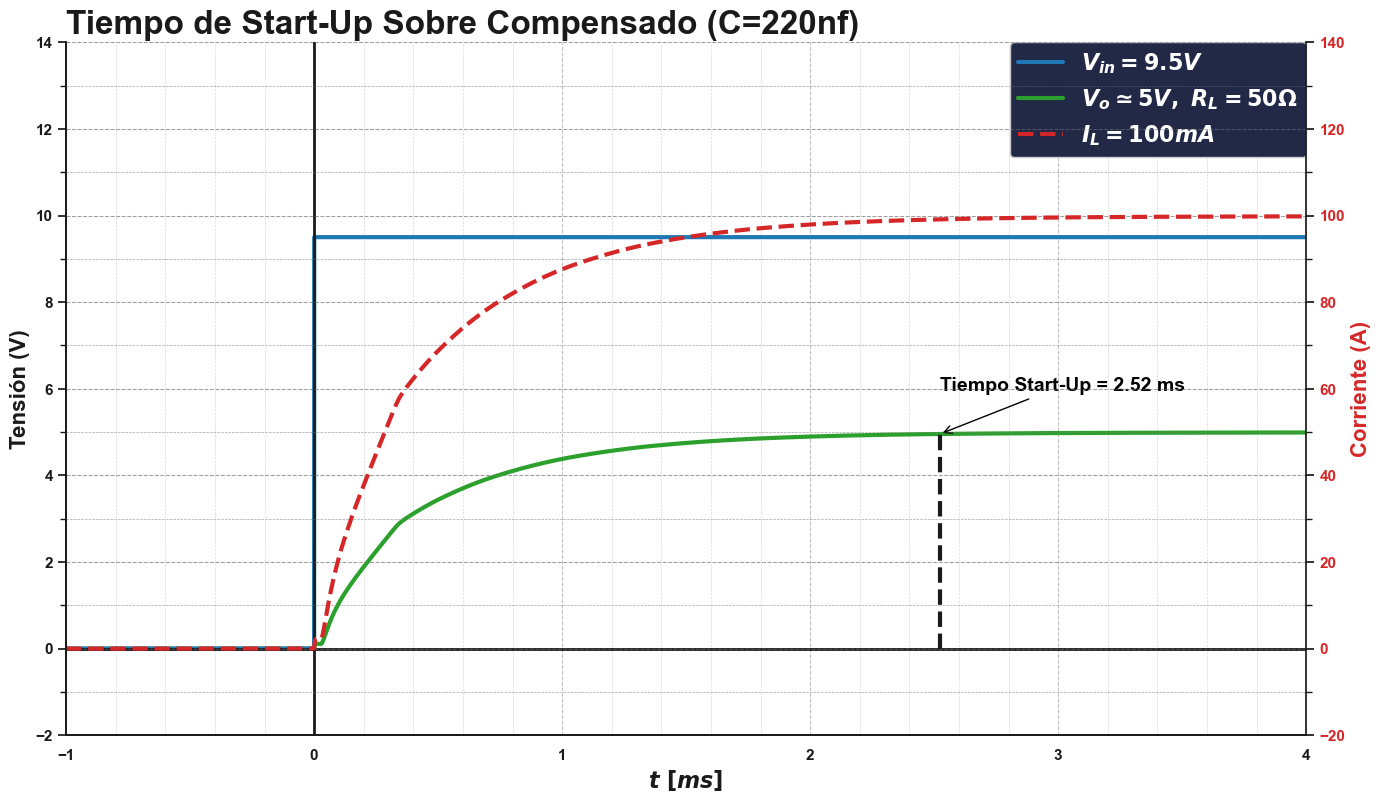

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Crear la figura
plt.figure(figsize=(16, 9))
ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

ax1.set_yticks(np.linspace(-2,14, 17), minor=True)

# Etiquetas de ejes
ax1.set_xlabel("$t\ [ms]$", fontsize=16)
ax1.set_ylabel("Tensión (V)", fontsize=16, color="k")

# Graficar tensión
line1, = ax1.plot(tStartUpSobre["time"]*1000, tStartUpSobre["V(vo)"], linewidth=3, color="tab:green")
line2, = ax1.plot(tStartUpSobre["time"]*1000, tStartUpSobre["V(vregp)"], linewidth=3, color="tab:blue")

valor_final = tStartUpSobre["V(vo)"].iloc[-1]
valor_99_3 = 0.993 * valor_final
instante_99_3 = tStartUpSobre[tStartUpSobre["V(vo)"] >= valor_99_3]["time"].iloc[0]

# Añadir anotación
ax1.vlines(x=instante_99_3*1000, ymin=0, ymax=valor_99_3, color='k', linewidth=3, linestyles='--')
ax1.annotate(
    r"Tiempo Start-Up = {:.2f} ms".format(instante_99_3*1000 ),
    xy=(instante_99_3 * 1000, valor_99_3),
    xytext=(instante_99_3 * 1000 , valor_99_3 + 1),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=14,
    color="black"
)

ax1.tick_params(axis="y", labelcolor="k")
ax1.set_ylim(-2, 14)
ax1.axhline(0, linestyle='-', linewidth=2, c='k')
ax1.axvline(0, linestyle='-', linewidth=2, c='k')

ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.2))  # o el paso que prefieras

# Asegurarte de que la grilla se aplique también a X menor
ax1.grid(which="major", axis="both", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
ax1.grid(which="minor", axis="both", color="grey", linestyle="--", linewidth=0.5, alpha=0.3)

# Crear un segundo eje para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente (A)", fontsize=16, color="tab:red")
line3, = ax2.plot(tStartUpSobre["time"]*1000, tStartUpSobre["I(Rl)"]*1000, linewidth=3, color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_yticks(np.linspace(-20,140, 17), minor=True)
ax2.set_ylim(-20, 140)

# Título y grillas
plt.title("Tiempo de Start-Up Sobre Compensado (C=220nf)", fontsize=24, loc="left")
plt.grid(which="major", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.set_xlim(-1, 4)

# Combinar leyendas
ax1.legend([line2, line1,  line3], [r"$V_{in}=9.5V$", r"$V_{o}\simeq5V,\ R_L=50\Omega$",r"$I_{L}=100mA$"], loc="upper right", fontsize=16,framealpha=1)

# Guardar con bordes ajustados
plt.savefig("CP2_tStartUpSobreComp.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()

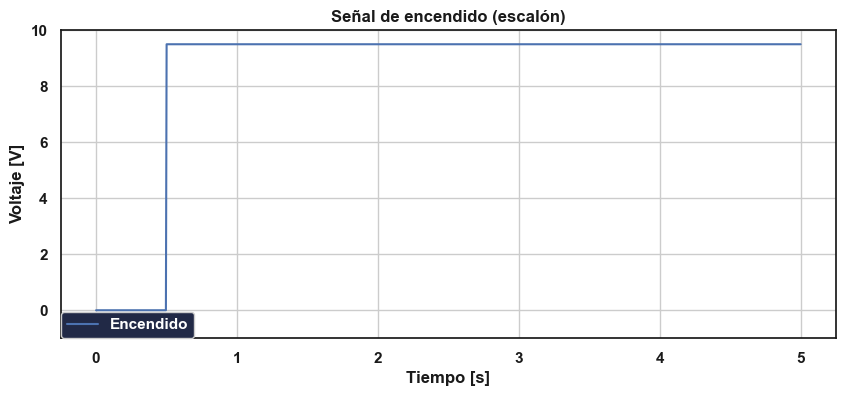

In [184]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)
V = 9.5 * (t >= 0.5)  # Escalón que se activa en t = 0.5 s

plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Señal de encendido (escalón)")
plt.grid(True)
plt.legend()
plt.ylim(-1, 10)
plt.show()

In [185]:
V = 9.5 * ((t >= 0.5) & (t <= 2.5))  # Encendido entre 0.5s y 2.5s

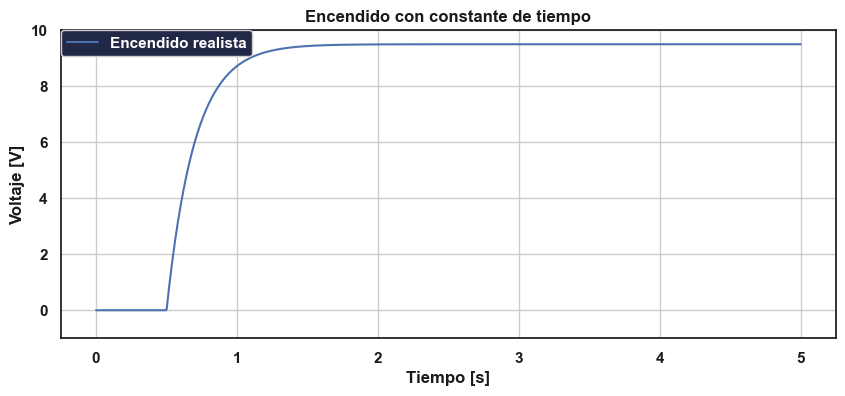

In [186]:
tau = 0.2  # constante de tiempo
V = 9.5 * (1 - np.exp(-(t - 0.5)/tau)) * (t >= 0.5)  # comienza en t = 0.5

plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido realista")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido con constante de tiempo")
plt.grid(True)
plt.legend()
plt.ylim(-1, 10)
plt.show()

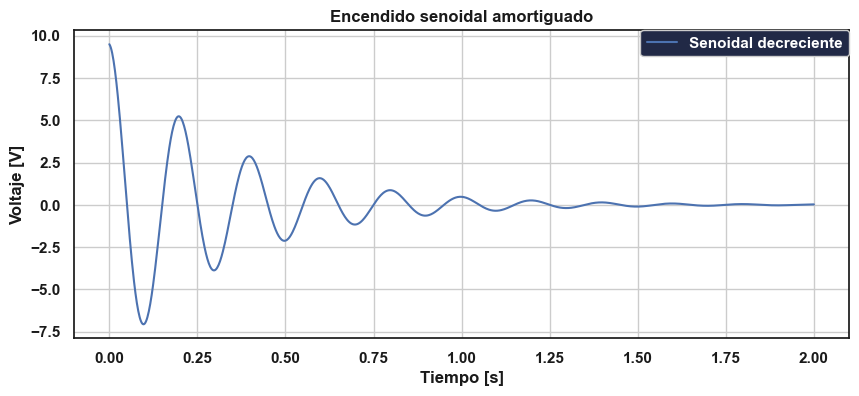

In [187]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2, 1000)
A = 9.5
alpha = 3       # cuánto decae
f = 5           # frecuencia (Hz)
phi = 0         # fase inicial

V = A * np.exp(-alpha * t) * np.cos(2 * np.pi * f * t + phi)

plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Senoidal decreciente")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido senoidal amortiguado")
plt.grid(True)
plt.legend()
plt.show()


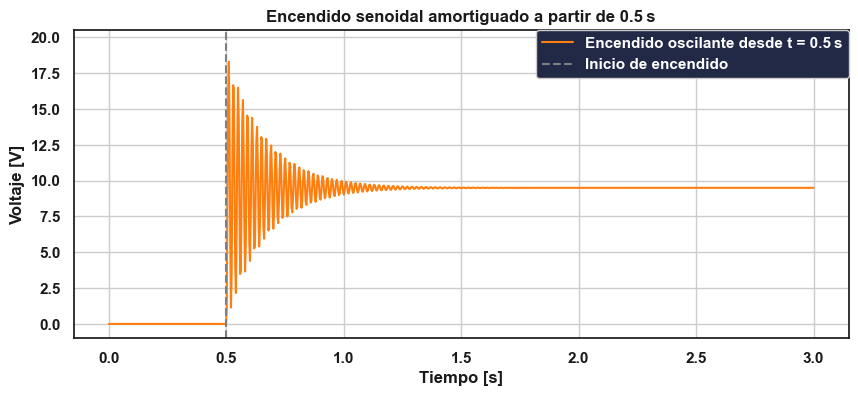

In [189]:
import numpy as np
import matplotlib.pyplot as plt

# Tiempo
t = np.linspace(0, 3, 1000)

# Parámetros de la señal
V_inicio = 0
V_final = 9.5
alpha = 6      # Amortiguamiento
f = 50          # Frecuencia (Hz)
t0 = 0.5       # Momento de encendido

# Parte oscilante: inicia en 0 a t0 y luego sube hacia 9.5 con oscilaciones amortiguadas
V_amort = V_final * (1 - np.exp(-alpha * (t - t0)) * np.cos(2 * np.pi * f * (t - t0)))

# Señal final: 0 antes de t0, luego V_amort
V = np.where(t < t0, 0, V_amort)

# Gráfico
plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido oscilante desde t = 0.5 s", color='tab:orange')
plt.axvline(t0, linestyle='--', color='gray', label="Inicio de encendido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido senoidal amortiguado a partir de 0.5 s")
plt.grid(True)
plt.legend()
plt.ylim(-1, 20.5)
plt.show()



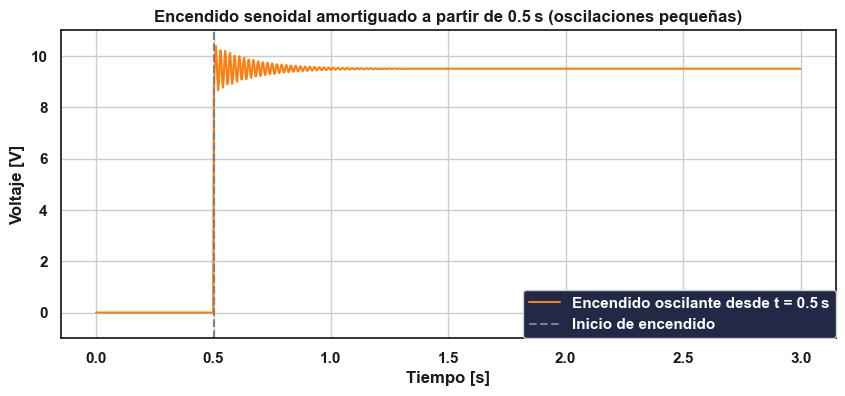

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Tiempo
t = np.linspace(0, 3, 1000)

# Parámetros de la señal
V_inicio = 0
V_final = 9.5
alpha = 6      # Amortiguamiento
f = 50         # Frecuencia (Hz)
t0 = 0.5       # Momento de encendido
A = 0.1        # Amplitud relativa de oscilación (10%)

# Parte oscilante desde t0 en adelante
V_amort = V_final * (1 - A * np.exp(-alpha * (t - t0)) * np.cos(2 * np.pi * f * (t - t0)))

# Señal final
V = np.where(t < t0, 0, V_amort)

# Gráfico
plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido oscilante desde t = 0.5 s", color='tab:orange')
plt.axvline(t0, linestyle='--', color='gray', label="Inicio de encendido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido senoidal amortiguado a partir de 0.5 s (oscilaciones pequeñas)")
plt.grid(True)
plt.legend()
plt.ylim(-1, 11)
plt.show()


<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Rendimiento**
    
</div>

In [196]:
rendimiento5 = pd.read_csv("LTSpice/Rendimiento/Rendimiento5.txt", delimiter="\t")
rendimiento5.head(2)

,Vin,Rendimiento
0,9.30,53.15
1,9.30,53.14


In [197]:
rendimiento500 = pd.read_csv("LTSpice/Rendimiento/Rendimiento500.txt", delimiter="\t")
rendimiento500.head(2)

,Vin,Rendimiento
0,9.30,26.09
1,9.30,26.09


In [198]:
rendimiento1k = pd.read_csv("LTSpice/Rendimiento/Rendimiento1k.txt", delimiter="\t")
rendimiento1k.head(2)

,Vin,Rendimiento
0,9.30,17.23
1,9.30,17.22


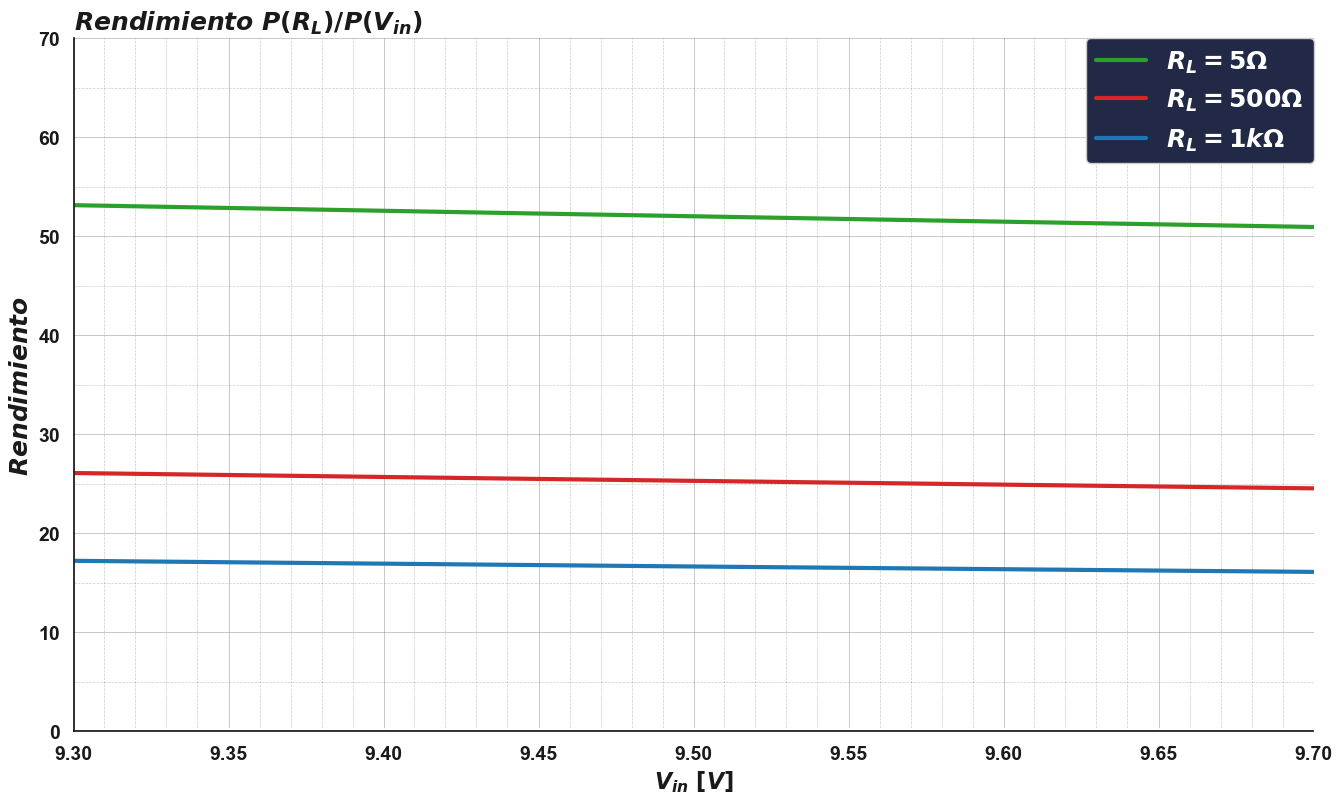

In [200]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

ax.set_xticks(np.linspace(9.3, 9.7, 41), minor=True)
ax.set_yticks(np.linspace(0, 70, 15), minor=True)

ax.set_ylim(-50e-3, 50e-3)
ax.set_ylabel(r"$Rendimiento$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title(r"$Rendimiento\ $"  r"$P(R_L)/P(V_{in})$", 
          fontsize=18, loc="left")
ax.set_xlabel(r"$V_{in}\ [V]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax.set_xticks(np.arange(9.3, 9.8, 0.05))
#ax.set_yticks(np.arange(-50, 51, 10))

line1, = ax.plot(rendimiento5["Vin"], rendimiento5["Rendimiento"], linestyle='-', linewidth=3, color="tab:green")
line2, = ax.plot(rendimiento500["Vin"], rendimiento500["Rendimiento"], linestyle='-', linewidth=3, color="tab:red")
line3, = ax.plot(rendimiento1k["Vin"], rendimiento1k["Rendimiento"], linestyle='-', linewidth=3, color="tab:blue")

ax.axhline(0, linestyle='-', linewidth=1, c='k')

# Mostrar leyenda
ax.legend([line1,line2,line3], [r"$R_{L}=5\Omega$",r"$R_{L}=500\Omega$",r"$R_{L}=1k\Omega$"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(9.3, 9.7)
plt.ylim(0, 70)

plt.savefig("CP2_Rendimiento.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Rendimiento R variable**
    
</div>

In [203]:
rendimientoRvar93 = pd.read_csv("LTSpice/Rendimiento/Rendimiento_vin_93.txt", delimiter="\t")
rendimientoRvar95 = pd.read_csv("LTSpice/Rendimiento/Rendimiento_vin_95.txt", delimiter="\t")
rendimientoRvar97 = pd.read_csv("LTSpice/Rendimiento/Rendimiento_vin_97.txt", delimiter="\t")

rendimientoRvar93.head(2)

,RL,Rend
0,0.00,0.00
1,0.00,0.00


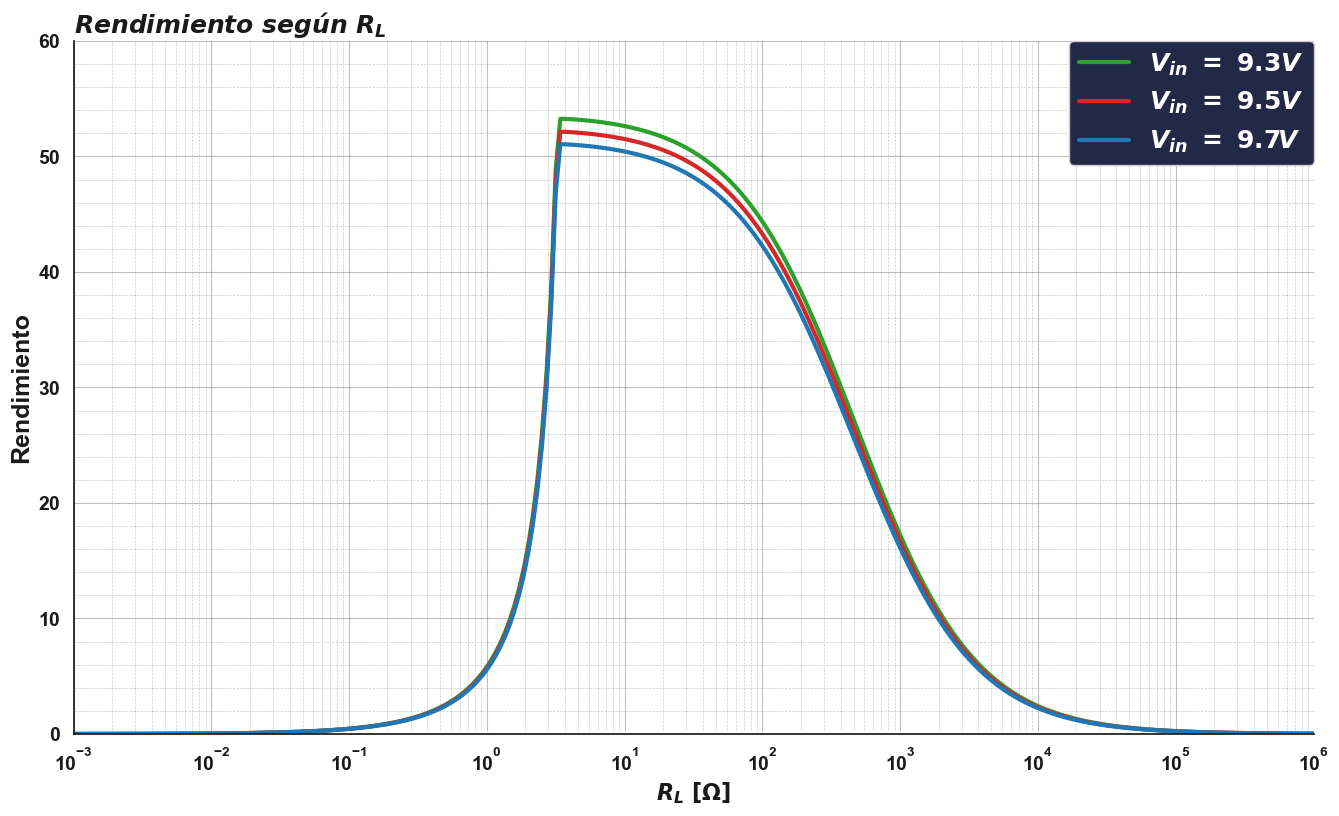

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))
ax1.set_xlabel(r"$R_L\ [\Omega]$", fontsize=16)  # Nombre del eje X

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')

ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0,60, 31), minor=True)
ax1.set_ylabel("Rendimiento", fontsize=18, color="k")
ax1.tick_params(axis='y', labelsize=14, colors='k')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')
plt.title(r"$Rendimiento\ según\ R_L$", fontsize=18, loc="left")  # Título centrado

# Configurar los ticks del eje X
a = np.append(np.linspace(0.001, 0.01, 11), np.linspace(0.01, 0.1, 11))
a = np.append(a, np.linspace(0.1, 1, 11))
a = np.append(a, np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
line1, = ax1.plot(rendimientoRvar93["RL"], rendimientoRvar93["Rend"], linestyle='-', linewidth=3, color="tab:green")
line2, = ax1.plot(rendimientoRvar95["RL"], rendimientoRvar95["Rend"], linestyle='-', linewidth=3, color="tab:red")
line3, = ax1.plot(rendimientoRvar97["RL"], rendimientoRvar97["Rend"], linestyle='-', linewidth=3, color="tab:blue")


plt.grid(which="major", color="grey", linestyle="-", linewidth=0.8, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)

# Mostrar leyenda
ax1.legend([line1,line2,line3], [r"$V_{in}\ =\ 9.3V$",r"$V_{in}\ =\ 9.5V$",r"$V_{in}\ =\ 9.7V$"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1e-3,1e6)
ax1.set_ylim(0, 60)

plt.savefig("CP2_Rendimiento_Rvar.png", bbox_inches="tight")

plt.show()

In [209]:
1/(2*np.pi*(86e3 )* (32e-9))

57.832464786299184

In [210]:
86e3


86000.0

In [211]:
(5.0195279+4.9795742)/2

4.99955105

In [212]:
(2.5069837+2.4869747)/2

2.4969792